### Codio Activity 15.3: Gradient Descent and Linear Regression

**Expected Time = 60 minutes**

**Total Points = 50**

In this activity you will use gradient descent to identify the parameter $\theta_0$ that minimizes the Mean Squared Error of predictions using the model $y = \theta_0  x$.  In this example, you will use a dataset containing information from a credit card company on customers.  Your goal will be to build a linear model to predict the balance using the credit rating. 

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)
- [Problem 5](#-Problem-5)

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [7]:
credit = pd.read_csv("./data/Credit.csv", index_col=0)

In [8]:
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


<Axes: >

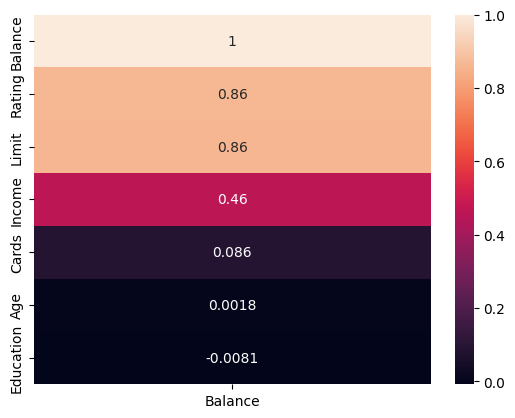

In [9]:
sns.heatmap(
    credit.corr(numeric_only=True)[["Balance"]].sort_values(
        by="Balance", ascending=False
    ),
    annot=True,
)

In [10]:
X = credit[["Rating"]]
y = credit["Balance"]

<Axes: xlabel='Rating', ylabel='Balance'>

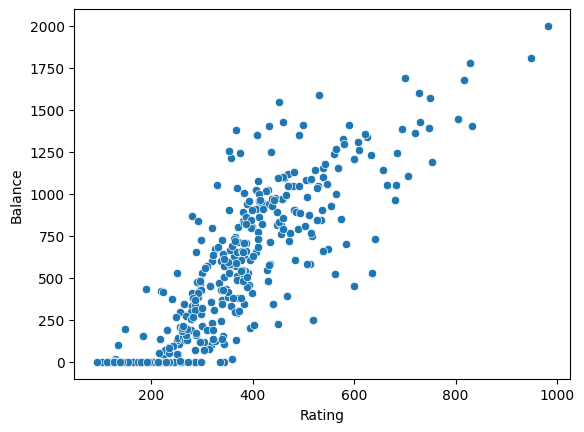

In [11]:
sns.scatterplot(data=credit, x="Rating", y="Balance")

[Back to top](#-Index)

### Problem 1

#### A Basic Model

**10 Points**

To begin, complete the function `mse` below that takes in a value for $\theta$ and returns the mean squared error based on the model 

$$\text{Balance} = \theta \times \text{Rating}$$

In [12]:
### GRADED
def mse(theta):
    """
    This function takes in a float for theta and
    returns the mean squared error according to the
    mean of the formula (y - theta*credit['Rating'])**2.

    Arguments
    ---------
    theta: float
          coefficient of linear model

    Returns
    -------
    mse: float
         Mean Squared Error of Linear model against y
    """
    return np.mean((y - theta * credit["Rating"]) ** 2)


### ANSWER CHECK
mse(10)

10550372.83

[Back to top](#-Index)

### Problem 2

#### Considering Many $\theta$'s

**10 Points**

Now, consider the array of thetas given below as `thetas`.  Iterate over the array of thetas and compute the **Mean Squared Error** for the given $\theta$.  Keep track of these in the list `mses` below.  Uncomment to plot to view the results.

In [13]:
thetas = np.linspace(-10, 13, 50)

In [14]:
### GRADED
mses = []
for theta in thetas:
    mses.append(mse(theta=theta))

### ANSWER CHECK
mses[-5:]

[13551514.585476885,
 14918512.776001668,
 16351547.666930446,
 17850619.258263227,
 19415727.55]

Text(0.5, 1.0, 'Mean Squared Error for given $\\theta$')

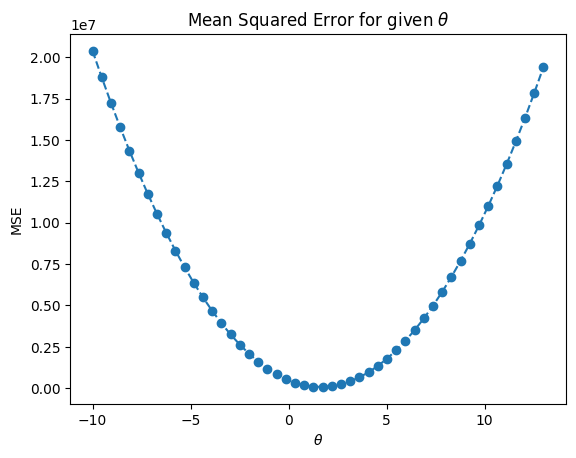

In [15]:
plt.plot(thetas, mses, "--o")
plt.xlabel(r"$\theta$")
plt.ylabel("MSE")
plt.title(r"Mean Squared Error for given $\theta$")

[Back to top](#-Index)

### Problem 3

#### Finding the $\theta$ that minimizes MSE

**10 Points**

Now, you are to use gradient descent with the following parameters to identify the $\theta$ that minimizes the `mse` function.  Again, you are given a function `df` to approximate the derivative of the `mse` function.

```
- x0 = 10
- step_size = 0.1
```

Use 200 iterations of the gradient descent algorithm.  Did the algorithm converge to a reasonable value?  Assign the value of theta to `theta_big_step` as a float below.

In [16]:
def df(x):
    return (mse(x + 0.001) - mse(x)) / 0.001

In [17]:
### GRADED
xs = [10]
for i in range(200):
    xs.append(xs[-1] - 0.1 * df(xs[-1]))

theta_big_step = xs[-1]

### ANSWER CHECK
xs[:10]

[10,
 -250558.17571148276,
 7509634241.824288,
 -225156150858558.2,
 -225156150858558.2,
 -225156150858558.2,
 -225156150858558.2,
 -225156150858558.2,
 -225156150858558.2,
 -225156150858558.2]

[Back to top](#-Index)

### Problem 4

#### A smaller step size

**10 Points**


Now, try using 1000 iterations of the gradient descent algorithm with:

```
x0 = 10
step_size = 0.000001
```

Did the algorithm converge?  What is the optimal $\theta$?  Assign as a float to `theta_small_step` below.

In [18]:
### GRADED
xs = [10]
for i in range(1000):
    xs.append(xs[-1] - 0.000001 * df(xs[-1]))

theta_small_step = xs[-1]

### ANSWER CHECK
xs[-5:]

[1.6400427248908689,
 1.6400427248908689,
 1.6400427248908689,
 1.6400427248908689,
 1.6400427248908689]

[Back to top](#-Index)

### Problem 5

#### Checking against `sklearn`

**10 Points**

Finally, you are to compare your solution using the small step size to that obtained from scikitlearn's `LinearRegression` estimator.  Be sure to set `fit_intercept = False`.  After fitting the estimator, determine the absolute difference between your solution for $\theta$ from [Problem 4](#-Problem-4) and the `.coef_` attribute of the fit sklearn model.  Assign as a float to `error`. Were you able to get a similar answer using gradient descent?

In [19]:
### GRADED
lr = LinearRegression(fit_intercept=False).fit(X, y)
error = abs(theta_small_step - lr.coef_)

### ANSWER CHECK
print(error)

[0.0005]
